# Comparaison des différentes méthodes pour la super résolution d'images

## I Importation des bibliothèques nécessaires

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import zipfile
import os
from src.linear_interpolation import LinearInterpolation
from src.bilinear_interpolation import BilinearInterpolation
from src.bicubic_interpolation import BicubicInterpolation

## II Téléchargement d'un dataset

In [12]:
!wget --no-check-certificate --no-clobber \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Extracting zip file to the base directory `/tmp/cats_and_dogs_filtered`
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

# Directories with training/validation cat/dogs pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

# Display the sizes of our dataset
print(f'Number of train cat images: {len(os.listdir(train_cats_dir))}')
print(f'Number of train dog images: {len(os.listdir(train_dogs_dir))}')
print(f'Number of valid cat images: {len(os.listdir(valid_cats_dir))}')
print(f'Number of valid dog images: {len(os.listdir(valid_dogs_dir))}')

# Display some images files for cats and dogs
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

File ‘/tmp/cats_and_dogs_filtered.zip’ already there; not retrieving.
Number of train cat images: 1000
Number of train dog images: 1000
Number of valid cat images: 500
Number of valid dog images: 500
['cat.778.jpg', 'cat.454.jpg', 'cat.611.jpg', 'cat.682.jpg', 'cat.639.jpg', 'cat.229.jpg', 'cat.856.jpg', 'cat.116.jpg', 'cat.200.jpg', 'cat.808.jpg']


## III Affichage de quelques exemples

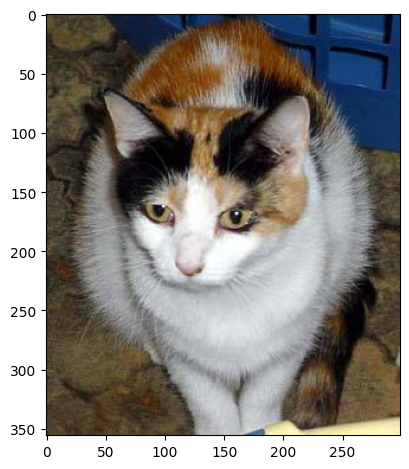

In [13]:
c = np.random.randint(len(os.listdir(train_cats_dir)))
cat = cv2.imread(train_cats_dir + '/' + train_cat_fnames[c])

# color are inverted
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

plt.imshow(cat)
plt.tight_layout()

## IV Test des différentes métriques

In [14]:
from metrics import Metric
from damage_image import Damager
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

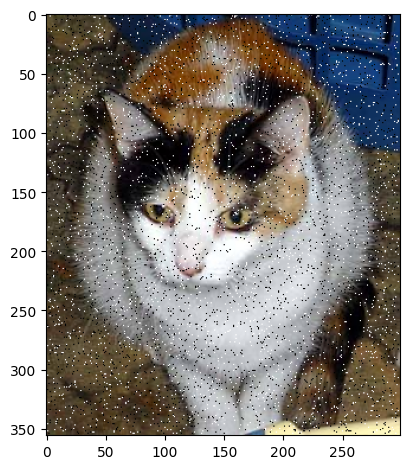

In [15]:
new_image = Damager.add_salt_and_pepper_noise(cat, 0.01, 0.01)

# Plot the damage cat
plt.imshow(new_image)
plt.tight_layout()


In [16]:
rng = np.linspace(0, 0.1, 100)

our_psnr = []
skimage_psnr = []
our_ssim_1 = []
our_ssim_2 = []
skimage_ssim = []

for i in range(0, len(rng)):
    new_image = Damager.add_salt_and_pepper_noise(cat, rng[i])
    
    our_psnr.append(Metric.PSNR(cat, new_image))

    # add little value to avoid same curve in the plot
    skimage_psnr.append(peak_signal_noise_ratio(cat, new_image))
    our_ssim_1.append(Metric.SSIM(cat, new_image))
    our_ssim_2.append(Metric.SSIM_2(cat, new_image))
    skimage_ssim.append(structural_similarity(cat, new_image, win_size=3, multichannel=False))

    # Print advancement
    if i % 10 == 0:
        print(f'Advancement: {i}/{len(rng)}')


Advancement: 0/100
Advancement: 10/100
Advancement: 20/100
Advancement: 30/100
Advancement: 40/100
Advancement: 50/100
Advancement: 60/100
Advancement: 70/100
Advancement: 80/100
Advancement: 90/100


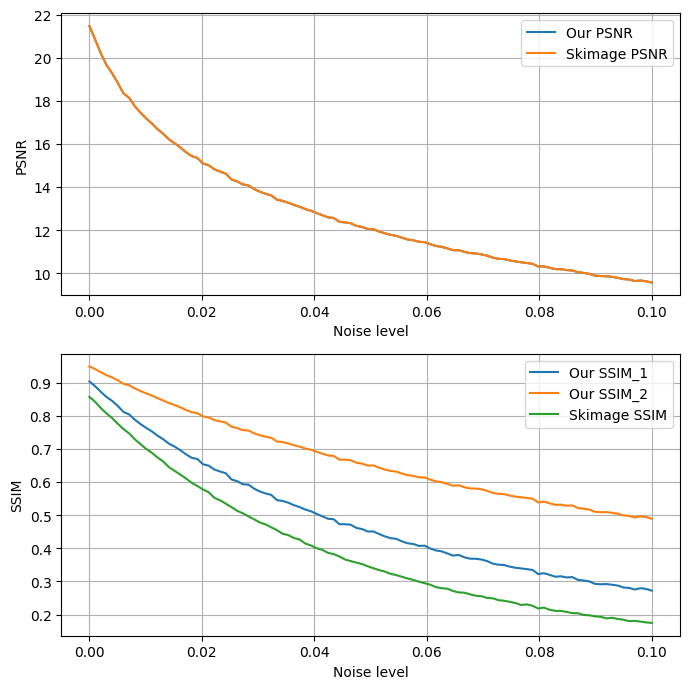

In [17]:
  
# Do two sub plots and plot the results (psnr for on case and ssim_1, ssim_2 for the other)
fig, axs = plt.subplots(2, 1, figsize=(7, 7))
axs[0].plot(rng, our_psnr, label='Our PSNR')
axs[0].plot(rng, skimage_psnr, label='Skimage PSNR')
axs[0].set_xlabel('Noise level')
axs[0].set_ylabel('PSNR')
axs[0].legend()
axs[0].grid()

axs[1].plot(rng, our_ssim_1, label='Our SSIM_1')
axs[1].plot(rng, our_ssim_2, label='Our SSIM_2')
axs[1].plot(rng, skimage_ssim, label='Skimage SSIM')
axs[1].set_xlabel('Noise level')
axs[1].set_ylabel('SSIM')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


In [18]:
# Show mean both mean diff and variance between SSIM_2 and SSIM from skimage

print(f'Mean diff between SSIM_2 and SSIM from skimage: {np.mean(np.array(our_ssim_1) - np.array(skimage_ssim))}')
print(f'Variance diff between SSIM_2 and SSIM from skimage: {np.var(np.array(our_ssim_1) - np.array(skimage_ssim))}')

# Show mean both mean diff and variance between PSNR and PSNR from skimage

print(f'Mean diff between PSNR and PSNR from skimage: {np.mean(np.array(our_psnr) - np.array(skimage_psnr))}')
print(f'Variance diff between PSNR and PSNR from skimage: {np.var(np.array(our_psnr) - np.array(skimage_psnr))}')

Mean diff between SSIM_2 and SSIM from skimage: 0.0941189247230742
Variance diff between SSIM_2 and SSIM from skimage: 0.00032968685313962924
Mean diff between PSNR and PSNR from skimage: 8.881784197001253e-17
Variance diff between PSNR and PSNR from skimage: 9.702989134218447e-31
